In [230]:
import joblib
import pandas as pd

# Caminho atualizado com barras normais
df = joblib.load('C:/Users/jonat/OneDrive/Documentos/Python Projects/mushroom-detection/data/processed/dados_processados.pkl')

In [232]:
# Selecionando as features que mais correlacionam
entradas = df[['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo']]
categoria = df['classe']
print(f"Formato das tabelas de dados {entradas.shape} e características dos cogumelos {categoria.shape}")

Formato das tabelas de dados (8124, 8) e características dos cogumelos (8124,)


In [233]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, categoria_treino, categoria_teste = train_test_split(entradas, categoria, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (6499, 8) e teste (1625, 8)


In [234]:
# Primeiras linhas do dataframe de entradas_treino
entradas_treino.head()

,forma-do-caule,raiz-do-caule,odor,habitat,cor-do-chapéu,forma-do-chapéu,número-do-anel,cor-do-velo
5112,0,0,4,3,9,3,1,2
7277,1,6,3,1,7,4,1,2
6803,1,6,4,1,7,3,1,2
3415,1,0,6,6,7,3,1,2
7645,1,6,8,3,7,4,1,2


In [235]:
# Primeiras linhas do dataframe de categoria_treino
categoria_treino.head()

5112    2
7277    2
6803    2
3415    1
7645    2
Name: classe, dtype: int64

In [236]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificador KNN
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, categoria_treino)

KNeighborsClassifier(n_neighbors=3)

In [237]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Para obter as previsões, basta chamar o método predict()
categoria_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(categoria_encontradas))

Predição: [1 2 1 ... 2 1 1]


In [238]:
# Para determinar a quantidade de acertos (acuracia)
from sklearn.metrics import accuracy_score
acertos = accuracy_score(categoria_teste, categoria_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  1.0


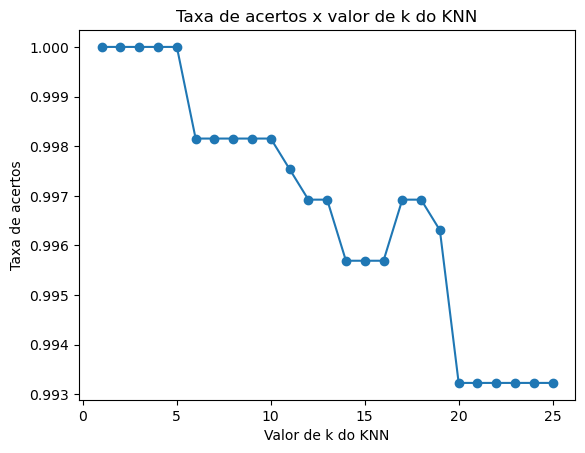

In [239]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir o intervalo de valores para k
k_range = list(range(1, 26))
acertos = []

# Loop para testar diferentes valores de k
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, categoria_treino)
    categoria_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(categoria_teste, categoria_encontradas))

# Plotar a taxa de acertos em função do valor de k
plt.plot(k_range, acertos, marker='o')
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

forma-do-caule - (1 = t)  = afunilando

raiz-do-caule - (2 = u) = copo

odor - (0 = a) = amêndoa

habitat - (3 = p) = trilhas

cor-do-chapéu - (1 = b) = creme

forma-do-chapéu - (3 = f) = plano

número-do-anel - (0 = n) = nenhum

cor-do-velo - (3 = y) = amarelo



In [240]:
# Teste 1
Test = pd.DataFrame([[1, 2, 0, 3, 1, 3, 0, 3]], columns=[ 'espaçamento-das-lâminas', 'número-do-anel', 'população','superfície-do-caule-acima-do-anel', 'tipo-de-velo', 'cor-do-caule-abaixo-do-anel', 'cor-das-lâminas','forma-do-chapéu'])
previsao = modelo.predict(Test)
print("Previsão:", previsao)

Previsão: [1]


#### **Testando classificação da categoria do cogumelo, se será (COMESTÍVEL = 1) ou (VENENOSO = 2)**

### No modelo de teste inserimos os seguintes dados para análise:

forma-do-caule - (0 = e) = alargando

raiz-do-caule - (0 = b) = bulbosa

odor - (5 = m) = mofado

habitat - (4 = u) = urbano

cor-do-chapéu - (4 = e) = verde

forma-do-chapéu - (0 = b) = sino

número-do-anel - (0 = n) = nenhum

cor-do-velo - (3 = y) = amarelo

In [242]:
# Teste 2
Test = pd.DataFrame([[0, 0, 5, 4, 4, 0, 0, 3]], columns=['forma-do-caule', 'raiz-do-caule', 'odor','habitat', 'cor-do-chapéu', 'forma-do-chapéu', 'número-do-anel','cor-do-velo'])
previsao = modelo.predict(Test)
print("Previsão:", previsao)

Previsão: [2]


### Preparação dos dados

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [247]:
import numpy as np  # Importa a biblioteca numpy

# Concatena os dados de 'entradas_treino' e 'entradas_teste' ao longo do eixo 0 (verticamente), formando um único array 'x_mushroom'
x_mushroom = np.concatenate((entradas_treino, entradas_teste), axis=0)

# Exibe as dimensões do array 'x_mushroom'
x_mushroom.shape

(8124, 8)

In [249]:
x_mushroom

array([[0, 0, 4, ..., 3, 1, 2],
       [1, 6, 3, ..., 4, 1, 2],
       [1, 6, 4, ..., 3, 1, 2],
       ...,
       [1, 6, 4, ..., 4, 1, 2],
       [1, 0, 6, ..., 2, 1, 2],
       [1, 3, 6, ..., 3, 1, 2]], dtype=int64)

In [248]:
# Concatena os dados de 'categoria_treino' e 'categoria_teste' ao longo do eixo 0 (verticamente), formando um único array 'y_mushroom'
y_mushroom = np.concatenate((categoria_treino, categoria_teste), axis=0)

# Exibe as dimensões do array 'y_mushroom'
y_mushroom.shape

(8124,)

In [250]:
y_mushroom

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

### Árvore de Decisão

In [251]:
parametros = {  # Dicionário contendo a grade de hiperparâmetros para busca
    'criterion': ['gini', 'entropy'],  # Critério para medir a qualidade da divisão (Gini ou Entropy)
    'splitter': ['best', 'random'],  # Estratégia para escolher a divisão em cada nó (Melhor ou Aleatória)
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras necessárias para estar em um nó folha
}


In [252]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)  # Cria o GridSearchCV com DecisionTreeClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
1.0


### Random Forest

In [253]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'criterion': ['gini', 'entropy'],  # Define a métrica para medir a qualidade das divisões (gini ou entropy)
    'n_estimators': [10, 40, 100, 150],  # Número de árvores na floresta do RandomForestClassifier
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 5, 10]  # Número mínimo de amostras que um nó folha deve ter
}


In [254]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)  # Cria o GridSearchCV com RandomForestClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)


{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
1.0


### KNN

In [255]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'n_neighbors': [3, 5, 10, 20],  # Número de vizinhos a serem usados pelo algoritmo K-Nearest Neighbors (KNN)
    'p': [1, 2]  # Parâmetro da métrica de distância: 1 para Manhattan (L1), 2 para Euclidiana (L2)
}

In [256]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)  # Cria o GridSearchCV com KNeighborsClassifier como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'n_neighbors': 3, 'p': 1}
0.9996307692307692


### Regressão Logística

In [257]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.0001, 0.00001, 0.000001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [1.0, 1.5, 2.0],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'solver': ['lbfgs', 'sag', 'saga']  # Algoritmo de otimização a ser usado na resolução do problema de ajuste do modelo
}

In [258]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)  # Cria o GridSearchCV com LogisticRegression como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.8764169003410383


### SVM

In [259]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'tol': [0.001, 0.0001, 0.00001],  # Tolerância para o critério de parada. Valores menores significam convergência mais precisa
    'C': [1.0, 1.5, 2.0],  # Parâmetro de regularização. Valores menores especificam uma regularização mais forte
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Tipo de função kernel a ser usada pelo SVM
}

In [260]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)  # Cria o GridSearchCV com SVC como estimador e o dicionário 'parametros' como grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, buscando a melhor combinação de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.9954456991284577


### Redes Neurais

In [261]:
parametros = {  # Define um dicionário chamado 'parametros' para armazenar as combinações de hiperparâmetros a serem testadas
    'activation': ['relu', 'logistic', 'tanh'],  # Função de ativação a ser usada nas camadas ocultas ('relu', 'logistic', 'tanh')
    'solver': ['adam', 'sgd'],  # Algoritmo para otimização do modelo ('adam', 'sgd')
    'batch_size': [10, 56]  # Tamanho do lote para atualização dos gradientes
}

In [262]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)  # Cria o GridSearchCV com MLPClassifier e a grade de hiperparâmetros
grid_search.fit(x_mushroom, y_mushroom)  # Ajusta o grid_search aos dados de treinamento, realizando a busca exaustiva de hiperparâmetros
melhores_parametros = grid_search.best_params_  # Obtém os melhores hiperparâmetros encontrados pelo GridSearchCV
melhor_resultado = grid_search.best_score_  # Obtém a melhor pontuação de desempenho alcançada durante a busca

In [263]:
print(melhores_parametros)  # Imprime os melhores hiperparâmetros
print(melhor_resultado)  # Imprime a melhor pontuação de desempenho (acurácia)

{'activation': 'tanh', 'batch_size': 56, 'solver': 'adam'}
1.0


### Validação Cruzada

In [265]:
from sklearn.model_selection import cross_val_score, KFold

# Inicialização de listas para armazenar os resultados das avaliações dos modelos
resultados_arvore = []  # Lista para armazenar os resultados da Árvore de Decisão
resultados_random_forest = []  # Lista para armazenar os resultados do Random Forest
resultados_knn = []  # Lista para armazenar os resultados do KNN
resultados_logistica = []  # Lista para armazenar os resultados da Regressão Logística
resultados_svm = []  # Lista para armazenar os resultados do SVM
resultados_rede_neural = []  # Lista para armazenar os resultados da Rede Neural

# Loop para realizar a validação cruzada 30 vezes com diferentes seeds
for i in range(30):
    print(i)  # Imprime o número da iteração atual

    # Criação do KFold com 10 divisões, embaralhando os dados e utilizando uma seed diferente a cada iteração
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)  # Cria uma instância do KFold para a validação cruzada

    # Avaliação da Árvore de Decisão
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')  # Define o modelo de Árvore de Decisão com hiperparâmetros especificados
    scores = cross_val_score(arvore, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_arvore.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do Random Forest
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)  # Define o modelo Random Forest com hiperparâmetros especificados
    scores = cross_val_score(random_forest, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_random_forest.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do KNN
    knn = KNeighborsClassifier()  # Define o modelo KNN com parâmetros padrão
    scores = cross_val_score(knn, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_knn.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Regressão Logística
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)  # Define o modelo de Regressão Logística com hiperparâmetros especificados
    scores = cross_val_score(logistica, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_logistica.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação do SVM
    svm = SVC(kernel='rbf', C=2.0)  # Define o modelo SVM com hiperparâmetros especificados
    scores = cross_val_score(svm, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_svm.append(scores.mean())  # Calcula e armazena a média das acurácias

    # Avaliação da Rede Neural
    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')  # Define o modelo de Rede Neural com hiperparâmetros especificados
    scores = cross_val_score(rede_
                             neural, x_mushroom, y_mushroom, cv=kfold)  # Executa a validação cruzada e armazena as acurácias
    resultados_rede_neural.append(scores.mean())  # Calcula e armazena a média das acurácias


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [266]:
import pandas as pd  # Importa a biblioteca pandas, que é utilizada para manipulação de dados em formato de tabelas
''
# Criação de um DataFrame com os resultados das validações cruzadas
resultados = pd.DataFrame({
    'Arvore': resultados_arvore,  # Coluna com os resultados da Árvore de Decisão
    'Random forest': resultados_random_forest,  # Coluna com os resultados do Random Forest
    'KNN': resultados_knn,  # Coluna com os resultados do KNN
    'Logistica': resultados_logistica,  # Coluna com os resultados da Regressão Logística
    'SVM': resultados_svm,  # Coluna com os resultados do SVM
    'Rede neural': resultados_rede_neural  # Coluna com os resultados da Rede Neural
})

# Exibição do DataFrame contendo os resultados
resultados  # Exibe o DataFrame na saída, mostrando a média das acurácias para cada modelo em cada iteração

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,1.0,1.000000,0.999754,0.876415,0.996307,1.000000
1,1.0,1.000000,0.999507,0.876418,0.996061,1.000000
2,1.0,1.000000,0.999754,0.876416,0.995692,1.000000
3,1.0,1.000000,0.999754,0.876418,0.995692,1.000000
4,1.0,1.000000,0.999385,0.876417,0.995815,1.000000
5,1.0,1.000000,0.999754,0.876414,0.996061,1.000000
6,1.0,1.000000,0.999754,0.876416,0.995938,1.000000
7,1.0,1.000000,0.999754,0.876418,0.995815,1.000000
8,1.0,1.000000,0.999754,0.876419,0.995938,0.999754
9,1.0,1.000000,0.999754,0.876419,0.995570,1.000000


In [267]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.0,0.999992,0.999680,0.876416,0.995942,0.999902
std,0.0,0.000045,0.000157,0.000002,0.000269,0.000198
min,1.0,0.999754,0.999262,0.876412,0.995323,0.999139
25%,1.0,1.000000,0.999754,0.876415,0.995723,0.999877
50%,1.0,1.000000,0.999754,0.876416,0.995938,1.000000
75%,1.0,1.000000,0.999754,0.876418,0.996184,1.000000
max,1.0,1.000000,0.999754,0.876419,0.996431,1.000000


In [268]:
# Calcula e exibe a variância dos resultados das validações cruzadas para cada modelo
# Baixa variância indica desempenho consistente e previsível do modelo, com variações mínimas nas acurácias entre as iterações.
# Alta variância sugere sensibilidade a pequenas mudanças nos dados ou hiperparâmetros, levando a um desempenho menos estável e mais variável durante as iterações da validação cruzada.
resultados.var()

Arvore           0.000000e+00
Random forest    2.022212e-09
KNN              2.464122e-08
Logistica        4.177358e-12
SVM              7.256610e-08
Rede neural      3.906020e-08
dtype: float64

In [269]:
# Calcula e exibe o Coeficiente de Variação (CV) dos resultados das validações cruzadas para cada modelo, em percentual
(resultados.std() / resultados.mean()) * 100

Arvore           0.000000
Random forest    0.004497
KNN              0.015703
Logistica        0.000233
SVM              0.027048
Rede neural      0.019766
dtype: float64